## Linear Regression Assignment
### Problem Statement
The ongoing Corona outbreak has caused significant drops in revenue for US bike-sharing company BoomBikes. The current state of the market is making it extremely difficult for the organization to survive. It has therefore made the conscious decision to develop a thoughtful business plan in order to boost its income as soon as the current lockdown ends and the economy recovers to a sound state.

To ascertain the variables influencing the demand for these shared bikes, they have hired a consultancy firm. Their specific goal is to comprehend the variables that influence the demand in the US market for these shared bikes. The business is curious about:

- Which factors are important for forecasting the need for shared bicycles.
- How well such factors capture the needs for bikes

In [195]:
# Import Required lib for MLR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Analyzing and Interpreting Data

In [196]:
#reading the data
data = pd.read_csv('day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


## The 730 rows and 16 columns of the dataset

In [197]:
## Checking Size
data.shape

(730, 16)

In [198]:
#looking up specific information about the dataset #verifying the quantity and kind of data in the provided dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [199]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [200]:
# explains the dataset's overall size.
data.size

11680

# Data Cleaning and preprocessing 

### Remove any columns that you don't need for data analysis.
- In the moment:since it is the record index for the day, the date features are already present, such as the year, month, and weekday, and they are entered as casual and in the cnt because the cnt is the sum of the two values..

In [201]:
data.isnull().sum() #checking for missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [202]:
data.drop(['casual'],axis=1,inplace=True)
## Weekdays and months cover it, therefore dteday is not helpful.
data.drop(['dteday'],axis=1,inplace=True)
data.drop(['registered'],axis=1,inplace=True)
## The total of these is removing casual and registering as CNT.


## removing the immediate column since it is only an index column and has no bearing on our goal.
data.drop(['instant'],axis=1,inplace=True)

### Examining data after it has been dropped 

In [203]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [205]:
data.columns #identifying all the column head

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [206]:
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


Therefore, it is evident from the correlation above that the weekday, season, and month—which are meant to be non-numerical—are numerical and need to be altered. 

# Outlier handling 

In [207]:
#provides details on the unique values found in the data
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

<Axes: ylabel='hum'>

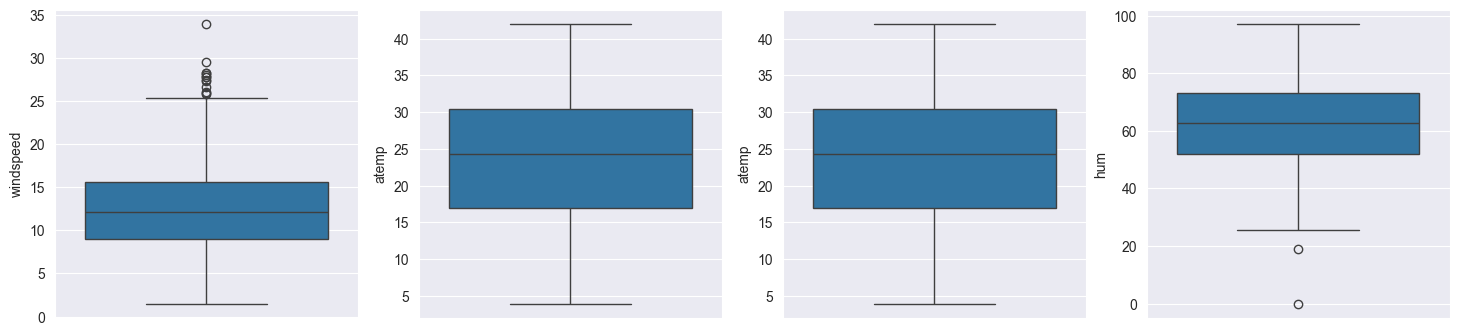

In [208]:
plt.figure(figsize=(18,4))
# Column windspeed
plt.subplot(1,4,1)
sns.boxplot(y='windspeed', data=data)

##Column atemp
plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=data)

## Column atemp
plt.subplot(1,4,3)
sns.boxplot(y='atemp', data=data)

## Column hum 
plt.subplot(1,4,4)
sns.boxplot(y='hum', data=data)

No outlier from above 

# EDA : Converting mainly numerical category data to more meaningful ones

In [209]:
data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [210]:
data.season.replace({1:"summer", 2:"spring", 3:"autumn", 4:"winter"},inplace = True)

In [211]:
data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [212]:
data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [213]:
data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [214]:
data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

In [215]:
data['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [216]:
data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

In [217]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,summer,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,summer,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,summer,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,summer,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,summer,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,summer,0,jan,0,thu,1,good,8.378268,11.66045,51.8261,6.000868,1606
6,summer,0,jan,0,fri,1,moderate,8.057402,10.44195,49.8696,11.304642,1510
7,summer,0,jan,0,sat,0,moderate,6.765000,8.11270,53.5833,17.875868,959
8,summer,0,jan,0,sun,0,good,5.671653,5.80875,43.4167,24.250650,822
9,summer,0,jan,0,mon,1,good,6.184153,7.54440,48.2917,14.958889,1321


## Data visualization to identify relationships between numerical variables

<Figure size 2000x1500 with 0 Axes>

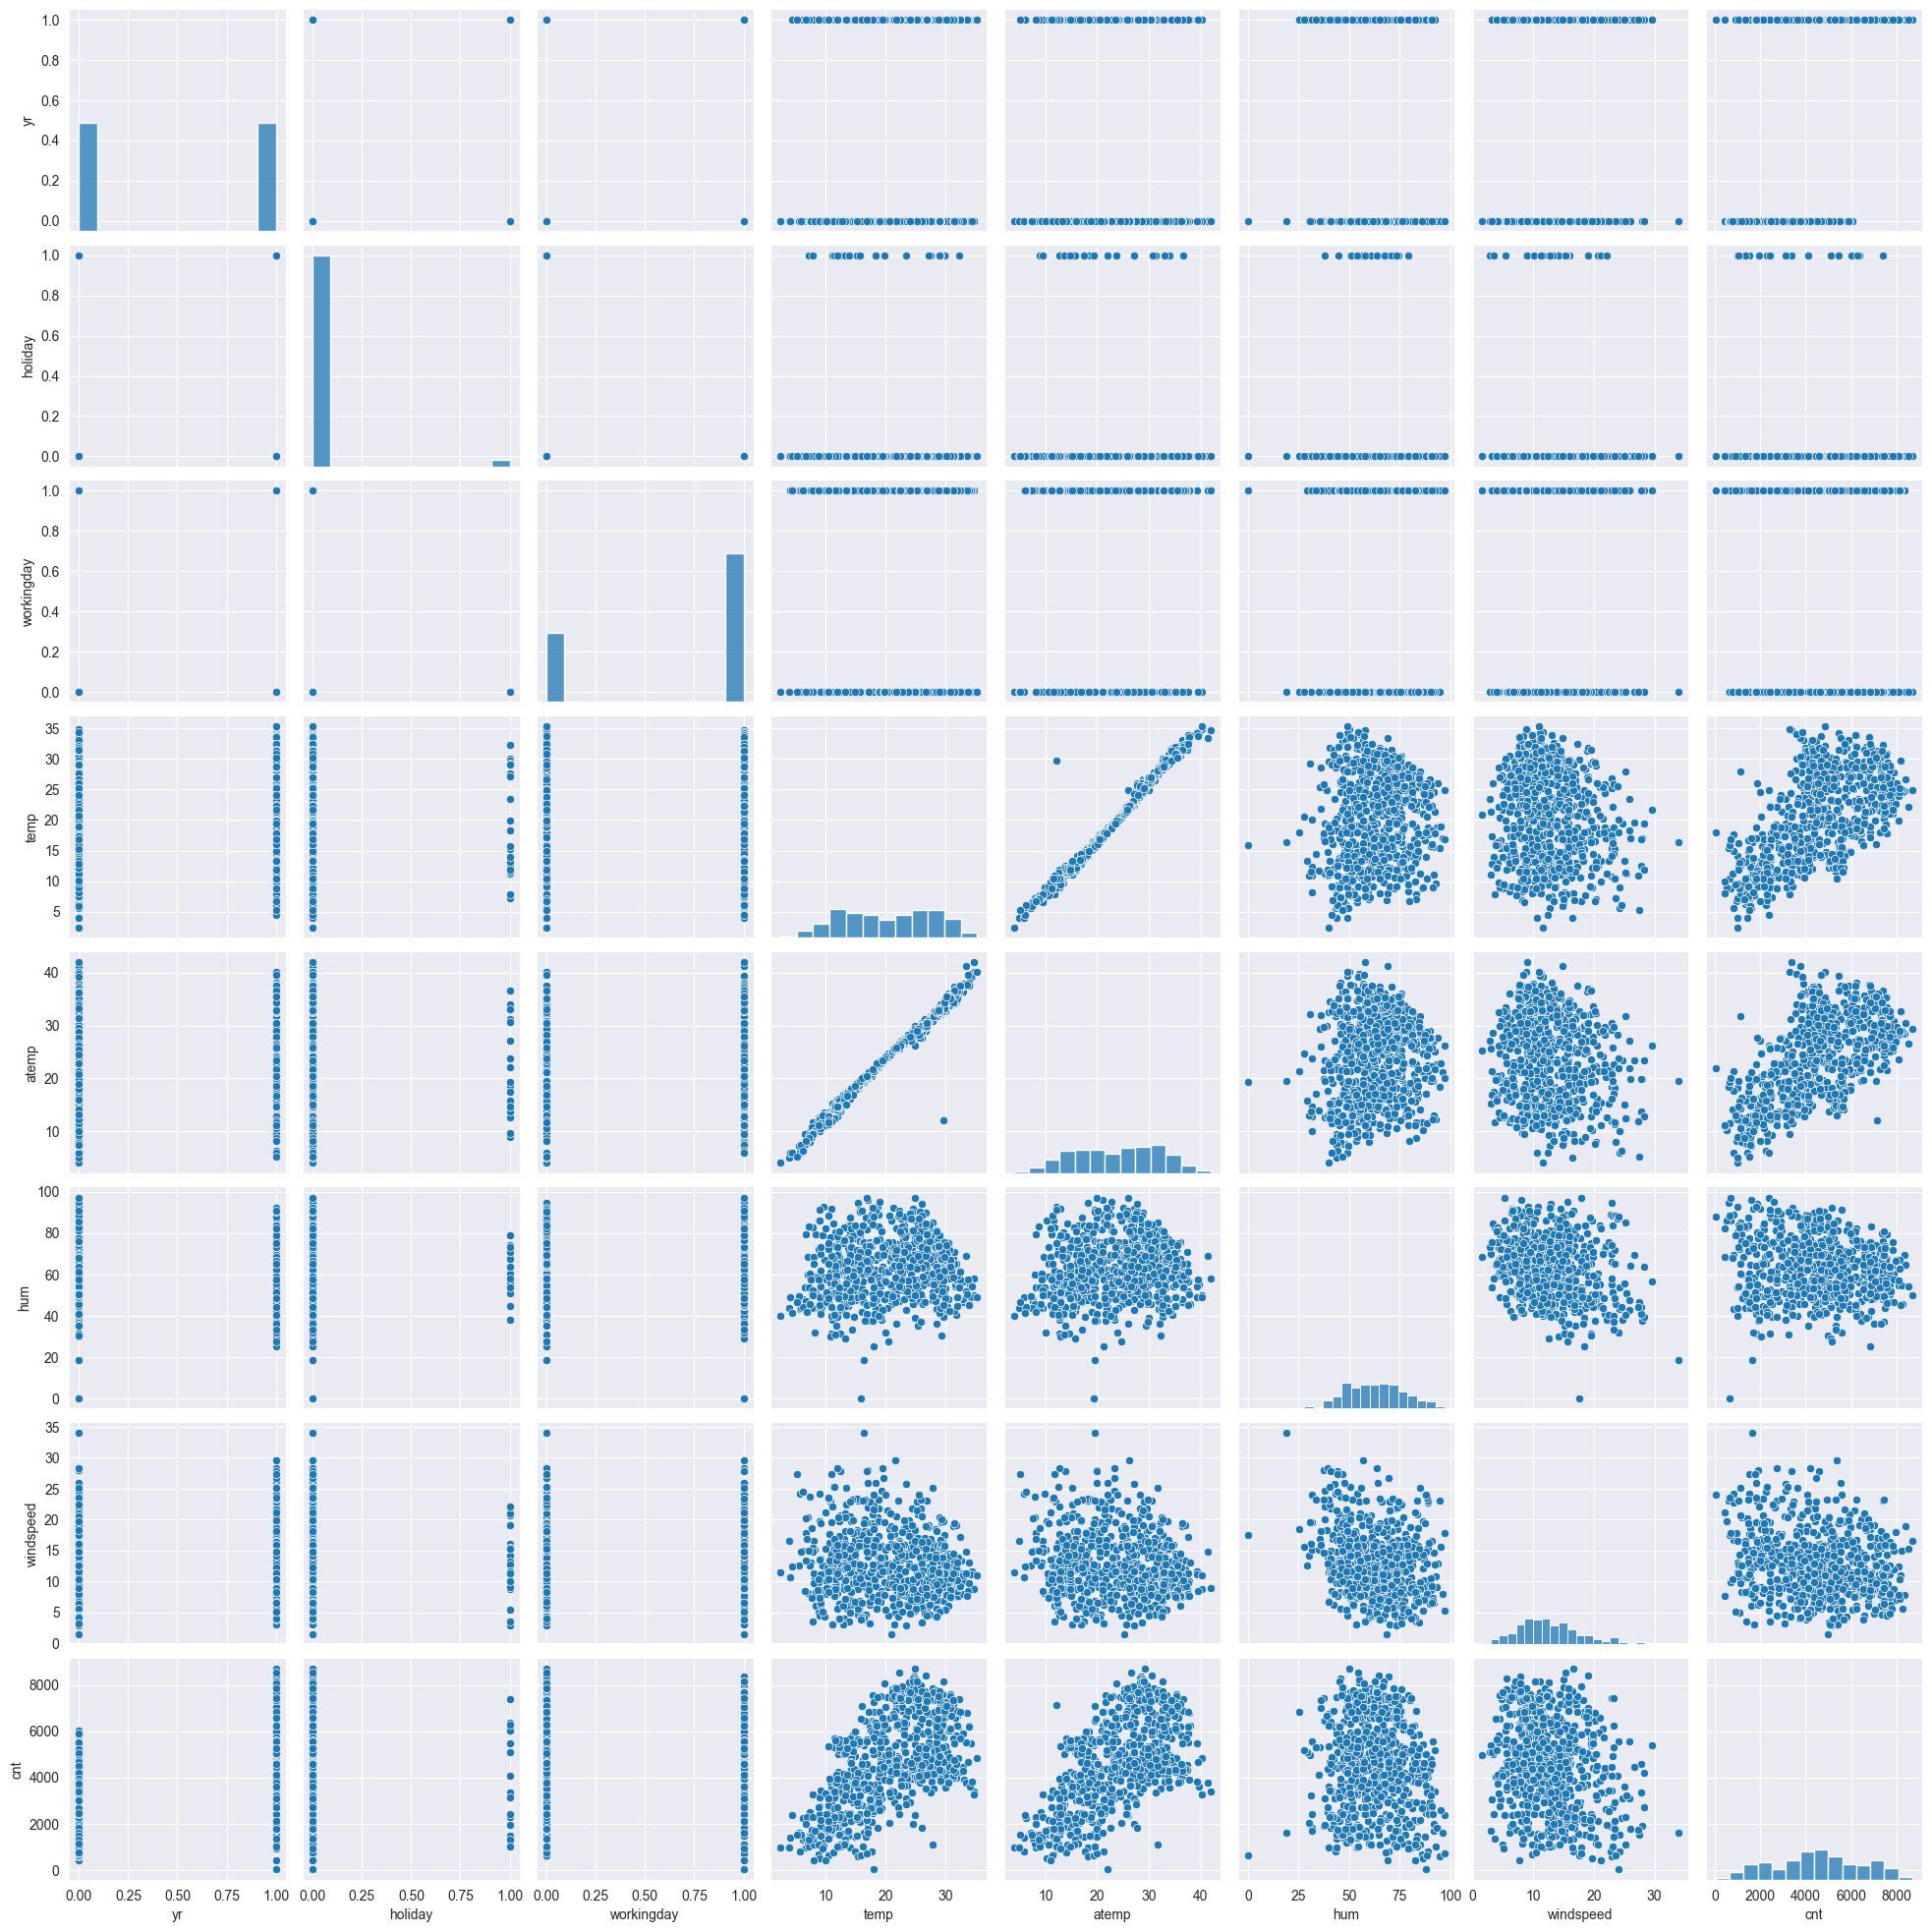

In [218]:
plt.figure(figsize=(20,15))
sns.pairplot(data)
plt.show()

<Figure size 1500x3000 with 0 Axes>

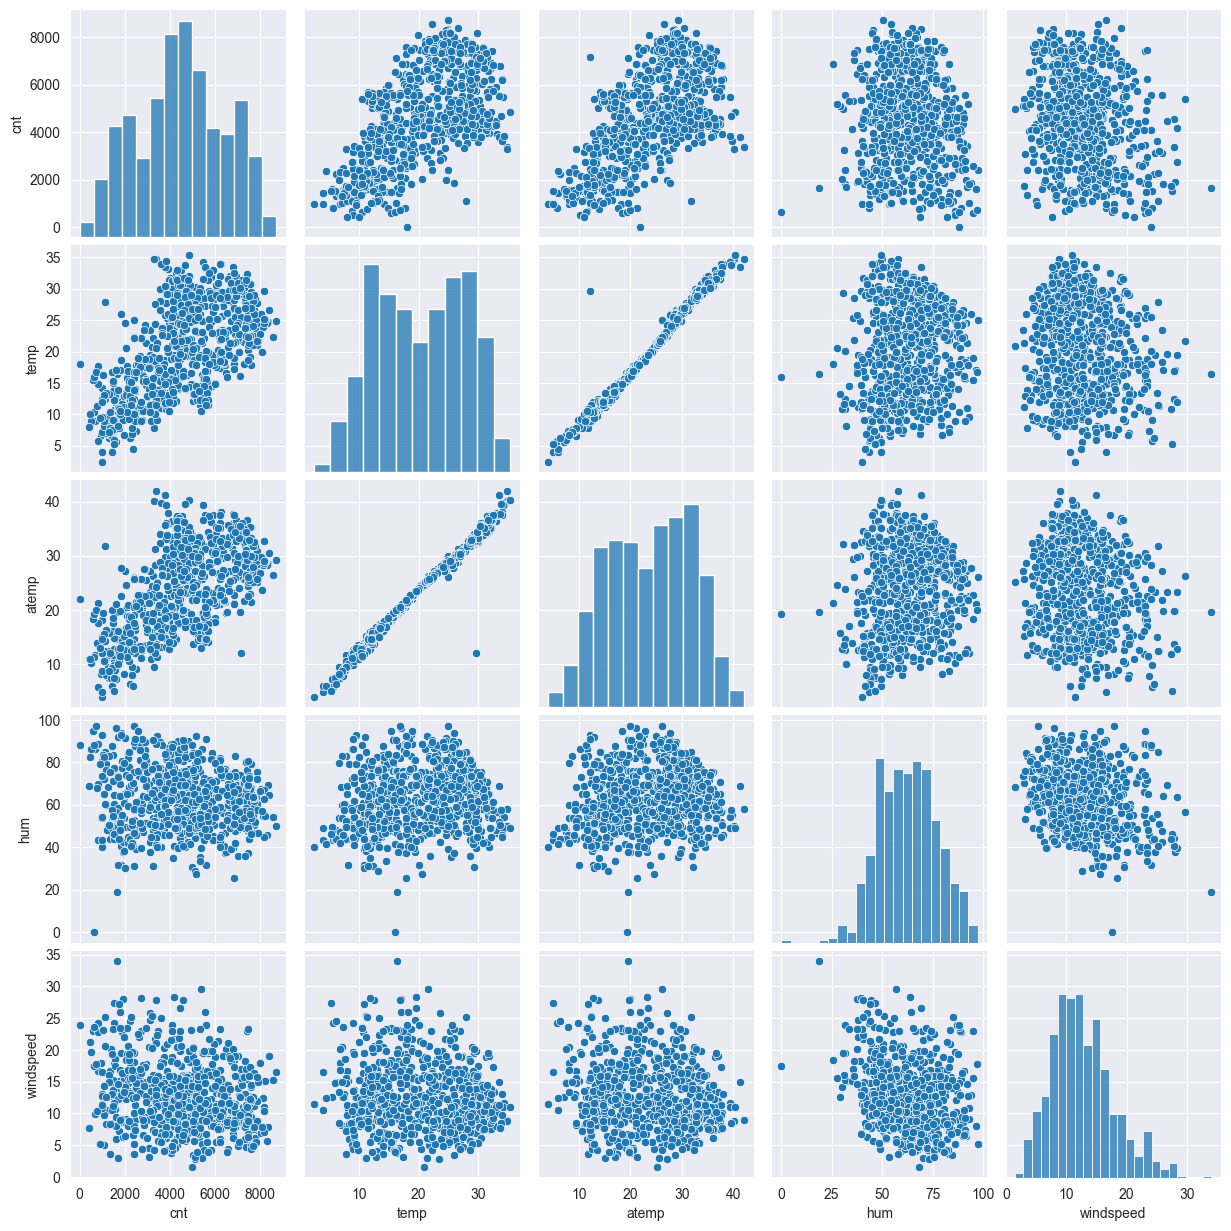

In [219]:
plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- Thus, it is evident from the charts above that there is a strong link between temperature and atemp.
- 
Additionally, we may infer from the graphs that TEMP and ATEMP have a linear relationship.

<Axes: xlabel='weathersit', ylabel='cnt'>

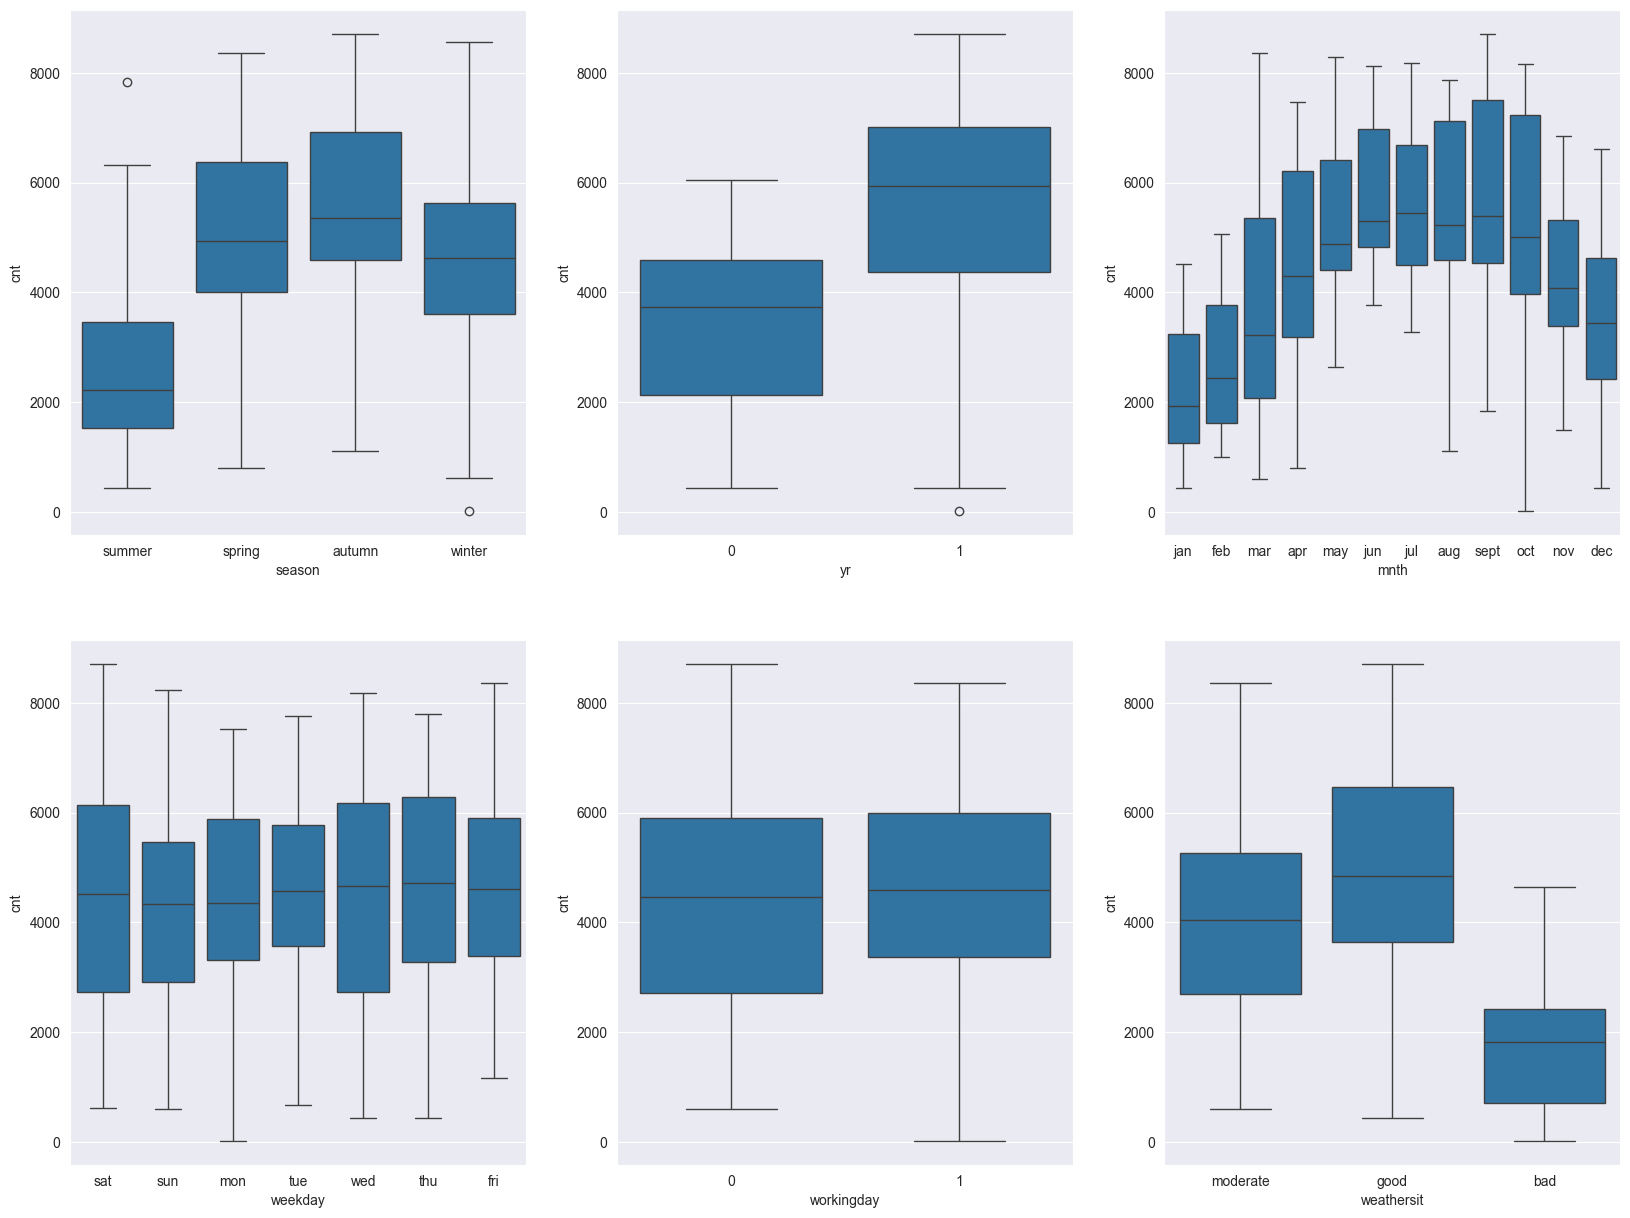

In [220]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=data)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=data)

# HeatMap

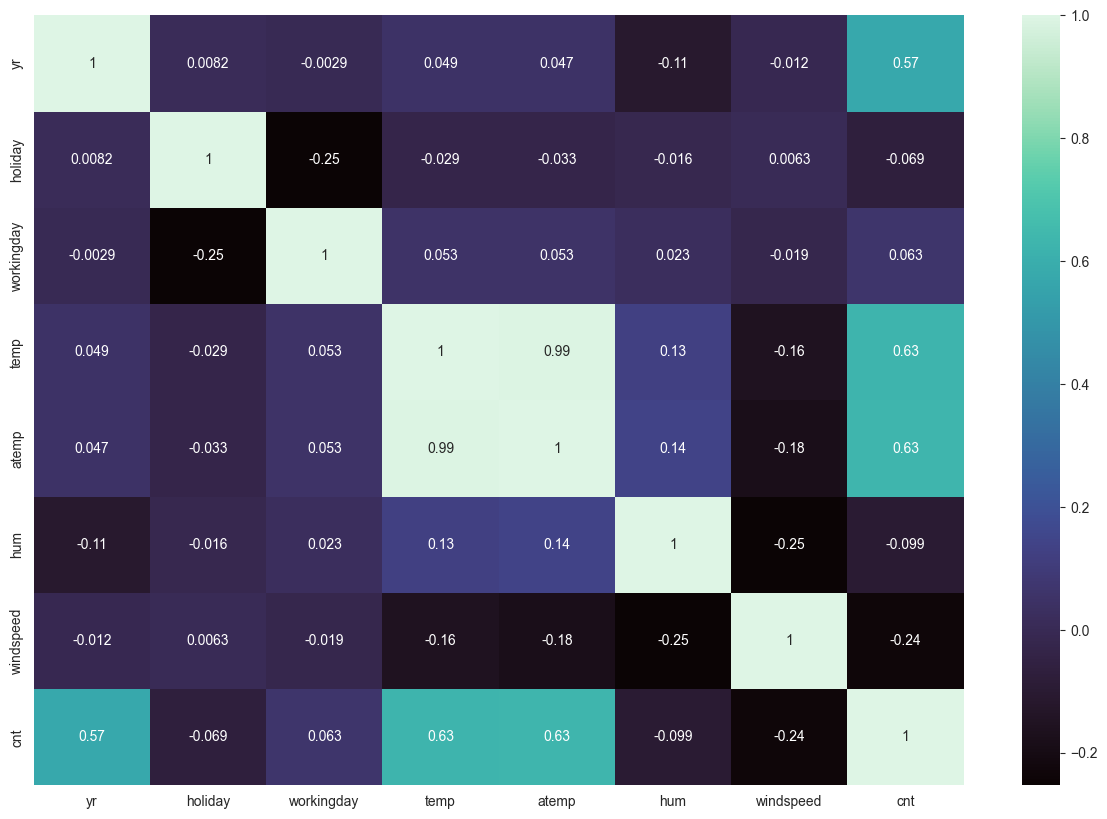

In [221]:
temp_data_frame = data[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

plt.figure(figsize=(15,10))
sns.heatmap(temp_data_frame.corr(),cmap="mako",annot=True)
plt.show()

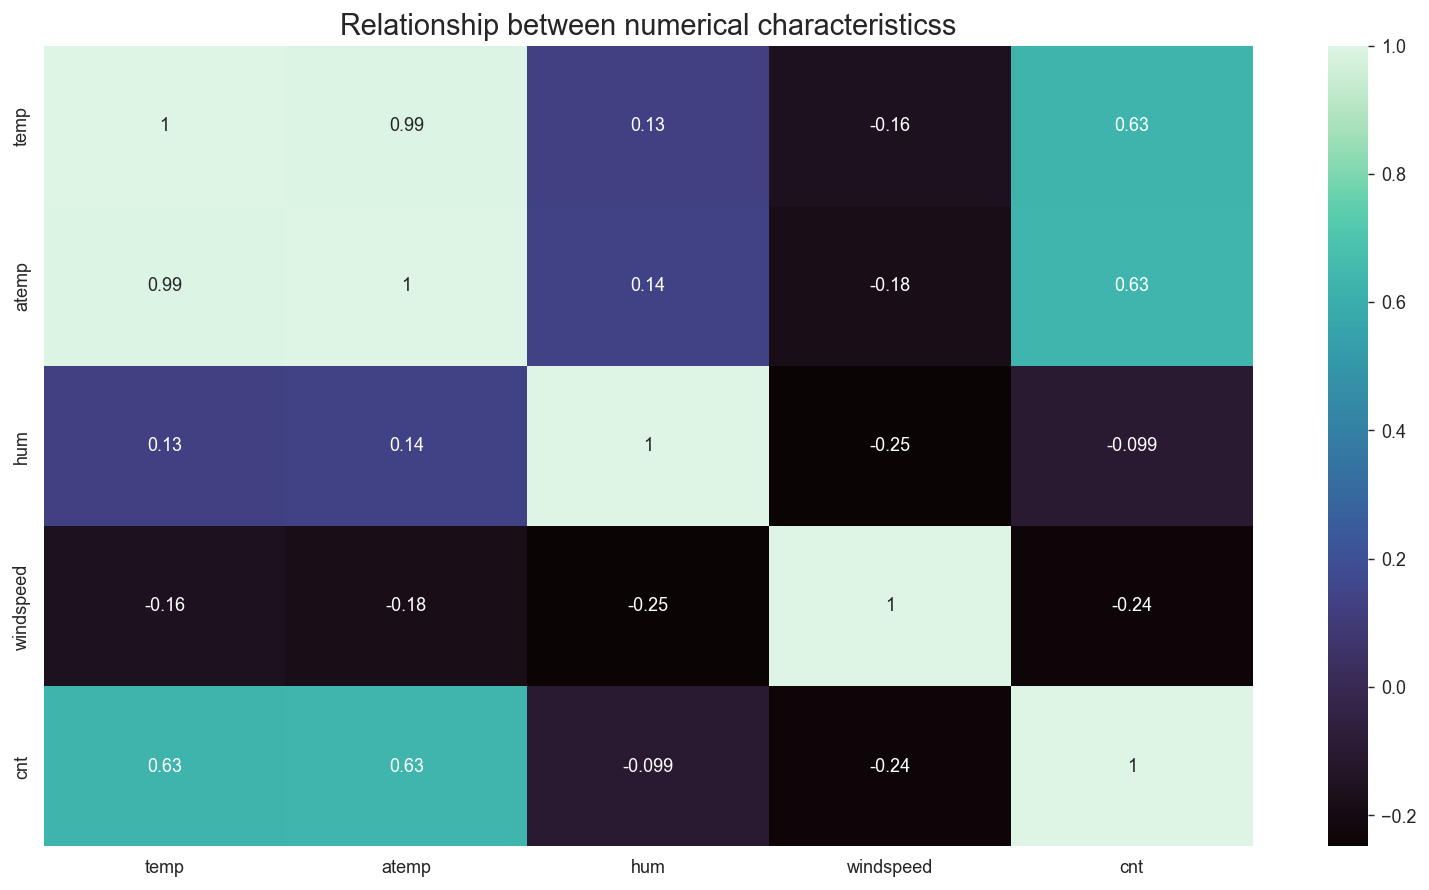

In [222]:
plt.figure(figsize=(15,8),dpi=130)
plt.title("Relationship between numerical characteristicss",fontsize=16)
sns.heatmap(data[["temp","atemp","hum","windspeed","cnt"]].corr(),annot= True,cmap="mako")
plt.show()

In [223]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Preparing data for linar regression. 
- 
Making fictitious variables for classification variables

In [224]:
data = pd.get_dummies(data=data,columns=["season","mnth","weekday"],drop_first=True)
data = pd.get_dummies(data=data,columns=["weathersit"])

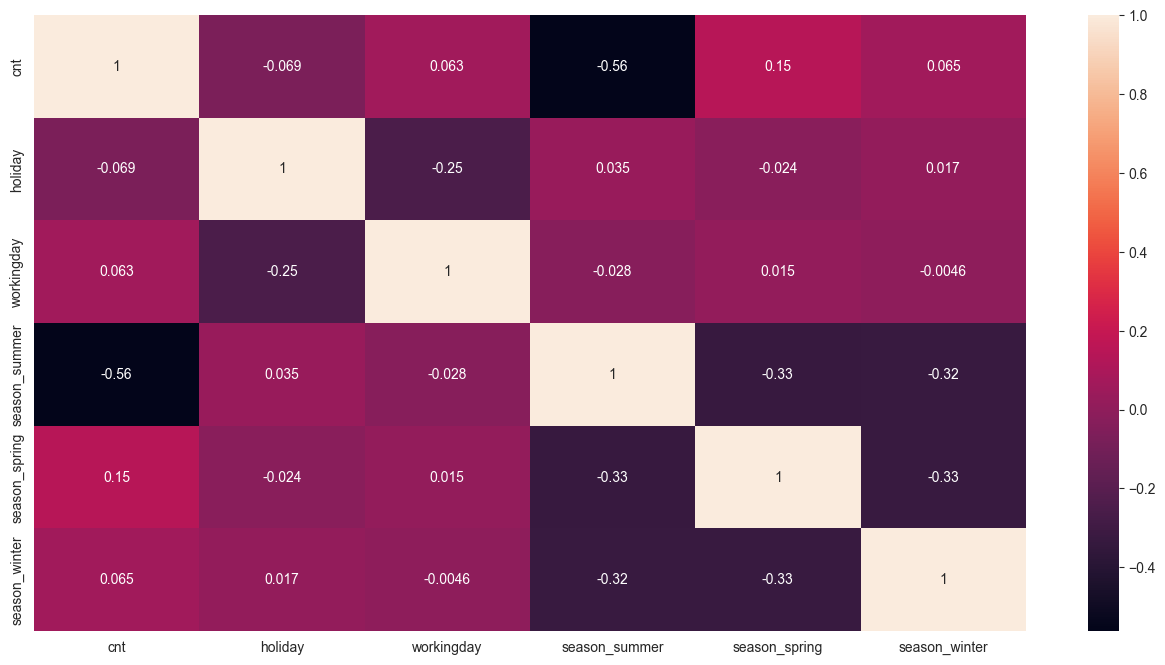

In [225]:
plt.figure(figsize = (16,8))
sns.heatmap(data[['cnt','holiday', 'workingday','season_summer','season_spring','season_winter']].corr(),annot = True)
plt.show()

- Throughout the week, the majority of the bikes have been rented.
- When the environment is clear, users choose to rent bikes.
- Bicycle rentals are cheapest on holidays.
- The fact that more bikes were hired in 2019 than in 2018 indicates that BOOM Bikes is operating profitably.tably.

In [226]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [227]:
data.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,True,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,True,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,True,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,True,...,False,False,False,False,False,False,True,False,True,False
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,False,True,...,False,False,False,False,True,False,False,False,True,False
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,False,True,...,False,False,False,False,False,False,False,False,False,True
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,False,True,...,False,False,True,False,False,False,False,False,False,True
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,False,True,...,False,False,False,True,False,False,False,False,True,False
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,False,True,...,False,True,False,False,False,False,False,False,True,False


### Using Recursive Feature Elimination (RFE) for Feature Selection

In [228]:
# y  will only include the target variable.
y = data.pop('cnt')

#X is all remainign variable also our independent variables
X = data

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [229]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [230]:
# Now let's scale continuous variables.
vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scal = MinMaxScaler()

#Fit and transform training set only
X_train[vars] = scal.fit_transform(X_train[vars])

In [231]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,511.0,0.520548,0.500067,0.0,0.000000,1.000000,1.000000,1.0
holiday,511.0,0.027397,0.163398,0.0,0.000000,0.000000,0.000000,1.0
workingday,511.0,0.669276,0.470935,0.0,0.000000,1.000000,1.000000,1.0
temp,511.0,0.550874,0.227231,0.0,0.354221,0.575304,0.745079,1.0
atemp,511.0,0.526518,0.212976,0.0,0.353207,0.563297,0.698389,1.0
hum,511.0,0.654174,0.143648,0.0,0.544598,0.659940,0.756977,1.0
windspeed,511.0,0.414873,0.185619,0.0,0.281934,0.384732,0.526481,1.0


In [232]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,True,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,False,True,False,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,True,False,False,...,False,True,False,False,False,False,False,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,False,True,False,...,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,False,False,False,False,False,False,True,False,False,True


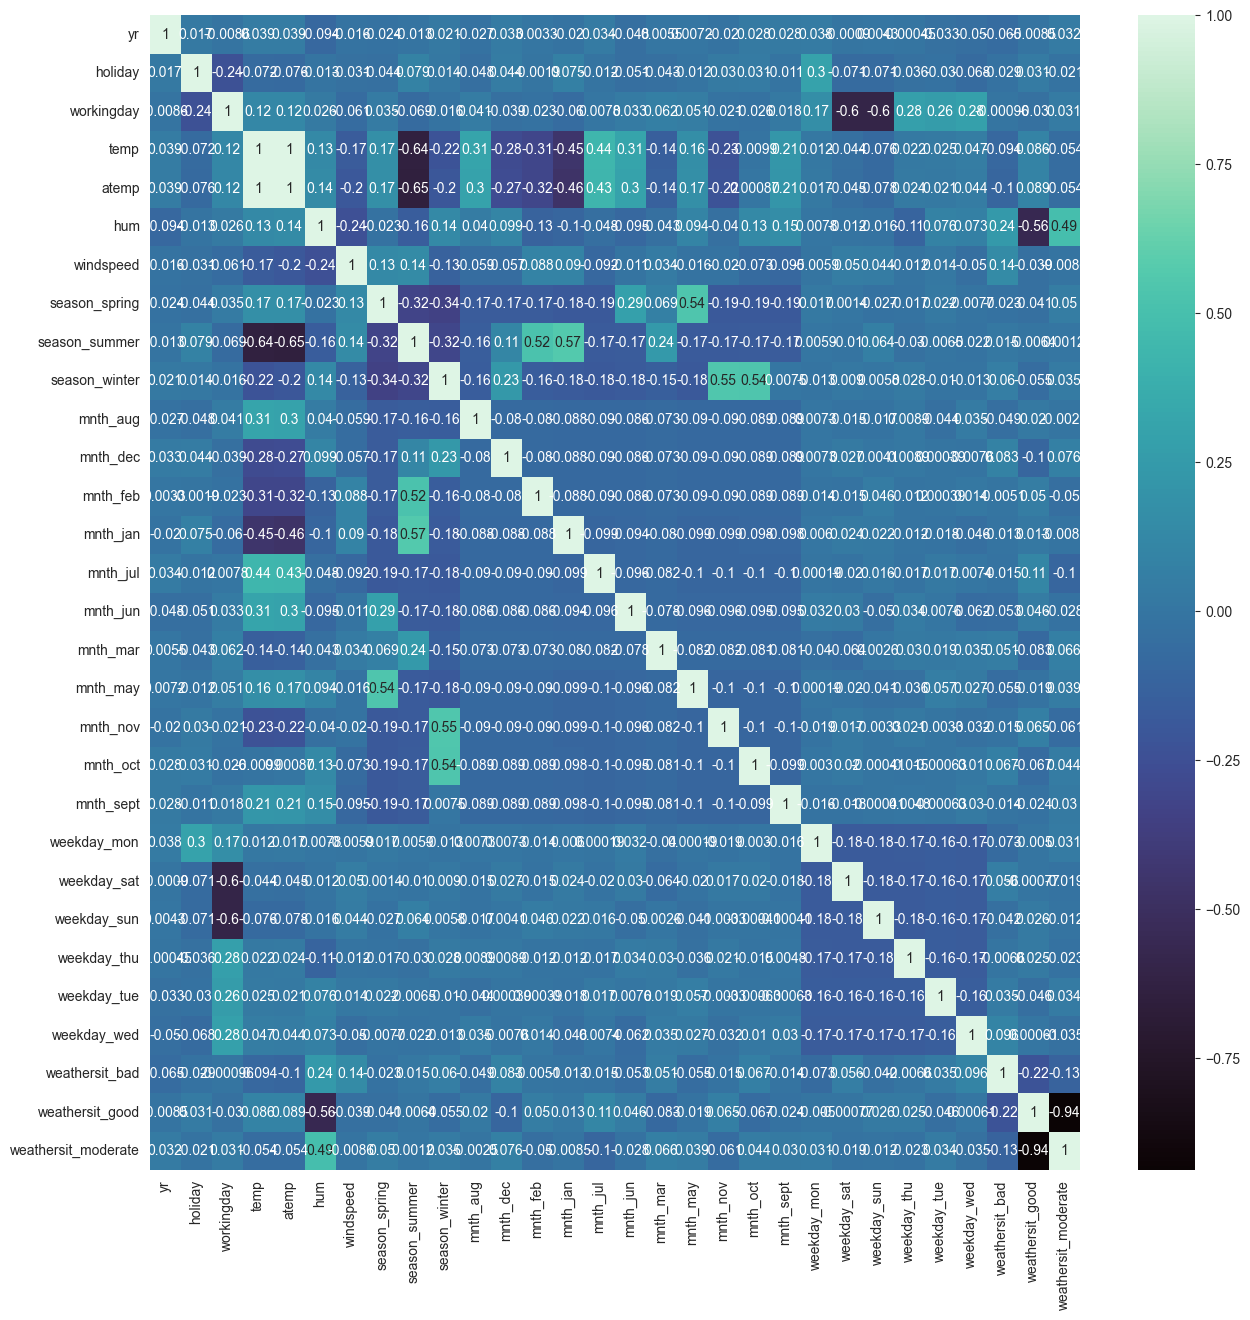

In [233]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), cmap="mako",annot=True)
plt.show()

# Build model using RFE

In [234]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [235]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,step = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [236]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 2),
 ('mnth_jan', False, 2),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [237]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    return lm

In [238]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values.astype(float), i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    return vif

### Building Model using statsmodels for the detailed statistics*

In [239]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [240]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [241]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [242]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [243]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [244]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

resp = build_model(cols)
resp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.52e-183
Time:                        22:40:49   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    345.568      6.867      0.000    1694.160    3052.080
yr                   1961.5662     71.693     27.361      0.000    1820.705    2102.427
holiday              -404.8446    232.361     -1.742      0.082    -861.379      51.690
workingday            328.5388    101.074      3.250      0.001     129.951     527.126
temp                 4206.9190    302.581     13.903      0.000    3612.417    4801.421
hum                 -1401.3792    335.322     -4.179      0.000   -2060.208    -742.550
windspeed           -1054.2249    209.338     -5.036      0.000   -1465.525    -642.924
season_spring         386.3630    132.293      2.920      0.004     126.437     646.289
season_summer        -774.6649    190.342     -4.070      0.000   -1148.643    -400.687
season_winter         780.2471    150.820      5.173      0.000     483.920    1076.574
mnth_jan              -63.3078    154.910     -0.409      0.683    -367.670     241.055
mnth_jul             -336.5196    158.692     -2.121      0.034    -648.313     -24.727
mnth_sept             685.3040    143.378      4.780      0.000     403.599     967.009
weekday_sat           379.7406    128.944      2.945      0.003     126.396     633.085
weathersit_bad      -1814.1986    237.231     -7.647      0.000   -2280.303   -1348.095
weathersit_moderate  -458.7748     92.648     -4.952      0.000    -640.807    -276.742
==============================================================================
Omnibus:                       61.386   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.455
Skew:                          -0.688   Prob(JB):                     9.44e-28
Kurtosis:                       4.988   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values.astype(float), i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
4,hum,27.40
3,temp,17.86
5,windspeed,5.70
2,workingday,5.16
7,season_summer,4.36
8,season_winter,3.22
6,season_spring,2.98
14,weathersit_moderate,2.22
0,yr,2.10
12,weekday_sat,1.91


## Model 2

In [246]:
# Eliminating the variable mnth_jan since its high p-value indicates that it is not significant and has a negative coefficient.
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
resp = build_model(cols)
resp_ = get_vif(cols)

In [247]:
resp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.59e-184
Time:                        22:40:50   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    343.226      6.869      0.000    1683.393    3032.104
yr                   1961.6091     71.633     27.384      0.000    1820.868    2102.351
holiday              -408.7276    231.971     -1.762      0.079    -864.495      47.040
workingday            327.4754    100.956      3.244      0.001     129.121     525.829
temp                 4232.8690    295.595     14.320      0.000    3652.096    4813.642
hum                 -1407.1034    334.748     -4.203      0.000   -2064.801    -749.405
windspeed           -1054.6342    209.160     -5.042      0.000   -1465.582    -643.686
season_spring         390.0005    131.883      2.957      0.003     130.883     649.118
season_summer        -786.8182    187.847     -4.189      0.000   -1155.892    -417.745
season_winter         787.9221    149.521      5.270      0.000     494.150    1081.694
mnth_jul             -339.1398    158.429     -2.141      0.033    -650.415     -27.865
mnth_sept             684.9929    143.256      4.782      0.000     403.530     966.456
weekday_sat           377.8982    128.757      2.935      0.003     124.922     630.874
weathersit_bad      -1808.2365    236.583     -7.643      0.000   -2273.065   -1343.408
weathersit_moderate  -457.2524     92.496     -4.944      0.000    -638.984    -275.521
==============================================================================
Omnibus:                       60.816   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.736
Skew:                          -0.683   Prob(JB):                     2.23e-27
Kurtosis:                       4.974   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
resp_.sort_values(by='VIF',ascending=False)

,Features,VIF
4,hum,26.96
3,temp,17.27
5,windspeed,5.68
2,workingday,5.15
7,season_summer,4.03
8,season_winter,3.20
6,season_spring,2.98
13,weathersit_moderate,2.21
0,yr,2.10
11,weekday_sat,1.90


## Model 3

In [249]:
# Eliminating the variable "hum" because of its high p-value and negative coefficient of insignificance
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
resp = build_model(cols)
resp_ = get_vif(cols)

resp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.46e-181
Time:                        22:40:50   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    284.828      5.352      0.000     964.724    2083.956
yr                   2003.5880     72.113     27.784      0.000    1861.904    2145.272
holiday              -411.6326    235.828     -1.745      0.082    -874.976      51.711
workingday            345.7174    102.540      3.372      0.001     144.252     547.183
temp                 4022.6695    296.180     13.582      0.000    3440.750    4604.589
windspeed            -792.7920    202.989     -3.906      0.000   -1191.615    -393.969
season_spring         381.5610    134.061      2.846      0.005     118.165     644.957
season_summer        -817.6472    190.825     -4.285      0.000   -1192.571    -442.723
season_winter         726.3826    151.277      4.802      0.000     429.161    1023.604
mnth_jul             -295.3186    160.715     -1.838      0.067    -611.083      20.446
mnth_sept             628.1283    144.988      4.332      0.000     343.264     912.992
weekday_sat           392.1242    130.853      2.997      0.003     135.031     649.217
weathersit_bad      -2223.4892    218.546    -10.174      0.000   -2652.878   -1794.101
weathersit_moderate  -682.5908     76.630     -8.908      0.000    -833.150    -532.031
==============================================================================
Omnibus:                       57.545   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.054
Skew:                          -0.651   Prob(JB):                     6.30e-26
Kurtosis:                       4.938   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
resp_.sort_values(by='VIF',ascending=False)

,Features,VIF
3,temp,8.28
4,windspeed,5.67
2,workingday,5.06
5,season_spring,2.62
6,season_summer,2.47
0,yr,2.09
7,season_winter,2.07
10,weekday_sat,1.87
8,mnth_jul,1.82
12,weathersit_moderate,1.57


## Model 4

In [251]:
# Holiday is being dropped since it has a negative coefficient and a high p-value, making it unimportant.
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

resp = build_model(cols)
resp_ = get_vif(cols)

resp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.56e-182
Time:                        22:40:50   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    282.885      5.155      0.000     902.521    2014.111
yr                   2001.8280     72.254     27.705      0.000    1859.867    2143.789
workingday            407.5068     96.433      4.226      0.000     218.040     596.973
temp                 4022.6376    296.788     13.554      0.000    3439.526    4605.749
windspeed            -775.8892    203.174     -3.819      0.000   -1175.074    -376.705
season_spring         381.1129    134.336      2.837      0.005     117.178     645.047
season_summer        -827.0266    191.141     -4.327      0.000   -1202.569    -451.484
season_winter         722.8763    151.574      4.769      0.000     425.073    1020.680
mnth_jul             -293.5891    161.042     -1.823      0.069    -609.994      22.816
mnth_sept             629.0117    145.284      4.330      0.000     343.566     914.458
weekday_sat           453.5926    126.284      3.592      0.000     205.478     701.707
weathersit_bad      -2220.1168    218.986    -10.138      0.000   -2650.368   -1789.866
weathersit_moderate  -680.0698     76.774     -8.858      0.000    -830.911    -529.229
==============================================================================
Omnibus:                       61.564   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.967
Skew:                          -0.695   Prob(JB):                     1.99e-27
Kurtosis:                       4.961   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
resp_.sort_values(by='VIF',ascending=False)

,Features,VIF
2,temp,7.99
3,windspeed,5.67
1,workingday,4.53
4,season_spring,2.60
5,season_summer,2.35
0,yr,2.09
6,season_winter,2.02
7,mnth_jul,1.82
9,weekday_sat,1.76
11,weathersit_moderate,1.57


In [253]:
# Eliminating the variable mnth_jul,temp since its high p-value indicates that it is not significant and has a negative coefficient.
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

resp = build_model(cols)
resp_ = get_vif(cols)

In [254]:
resp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.57e-182
Time:                        22:40:50   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    281.199      4.951      0.000     839.667    1944.628
yr                   1997.3368     72.380     27.595      0.000    1855.130    2139.544
workingday            418.6348     96.464      4.340      0.000     229.110     608.160
temp                 3931.3462    293.213     13.408      0.000    3355.261    4507.431
windspeed            -769.1366    203.613     -3.777      0.000   -1169.181    -369.092
season_spring         490.9603    120.344      4.080      0.000     254.518     727.403
season_summer        -745.7759    186.305     -4.003      0.000   -1111.815    -379.737
season_winter         811.4398    143.912      5.638      0.000     528.691    1094.189
mnth_sept             725.1155    135.698      5.344      0.000     458.506     991.725
weekday_sat           466.1839    126.388      3.689      0.000     217.865     714.502
weathersit_bad      -2232.9618    219.382    -10.178      0.000   -2663.988   -1801.936
weathersit_moderate  -674.1503     76.884     -8.768      0.000    -825.206    -523.094
==============================================================================
Omnibus:                       64.315   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.618
Skew:                          -0.730   Prob(JB):                     5.28e-28
Kurtosis:                       4.941   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
resp_.sort_values(by='VIF',ascending=False)

,Features,VIF
2,temp,6.14
3,windspeed,5.67
1,workingday,4.52
5,season_summer,2.24
0,yr,2.09
4,season_spring,2.07
6,season_winter,1.79
8,weekday_sat,1.76
10,weathersit_moderate,1.57
7,mnth_sept,1.25


In [256]:
# Create a model with every column so that features can be chosen automatically.
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [257]:
cols_data = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

#Let's use sklearn to construct the final model.
#Create a model with columns above.
lr = build_model_sk(X_train[cols_data],y_train)
print(lr.intercept_,lr.coef_)

479.74578948216094 [ 1983.59768082   742.26090463  -131.83352513  1291.07224046
   815.99213592  -351.39104763 -2266.66555376  -676.27076741
  5116.59359189]


### Residual Analysis

In [258]:
y_train_pred = lr.predict(X_train[cols_data])

In [259]:
# Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

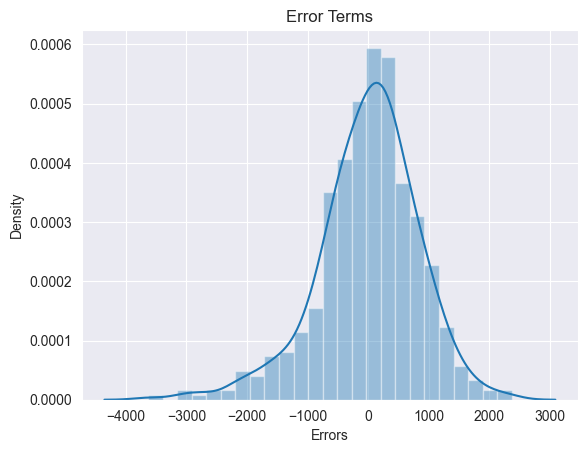

In [260]:
plot_res_dist(y_train, y_train_pred)

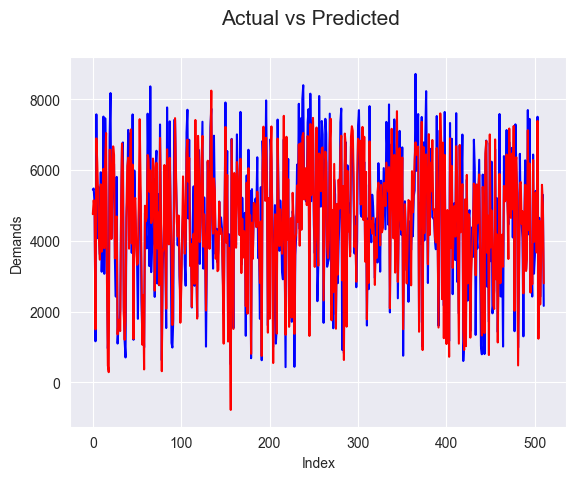

In [261]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Model Predictions

## R-Squared value for forecasting trains

In [262]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8141230144812581

### Value prediction on a test dataset

In [263]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scal.transform(X_test[num_vars])

## R-squared value for forecasting test results

In [264]:
#Predicting test data values
y_test_pred = lr.predict(X_test[cols_data])

# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8061354900977835

In [265]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8061354900977835

Text(0, 0.5, 'y_pred')

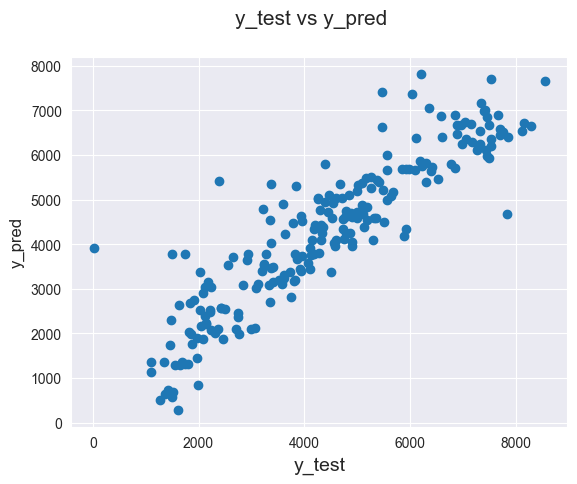

In [266]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

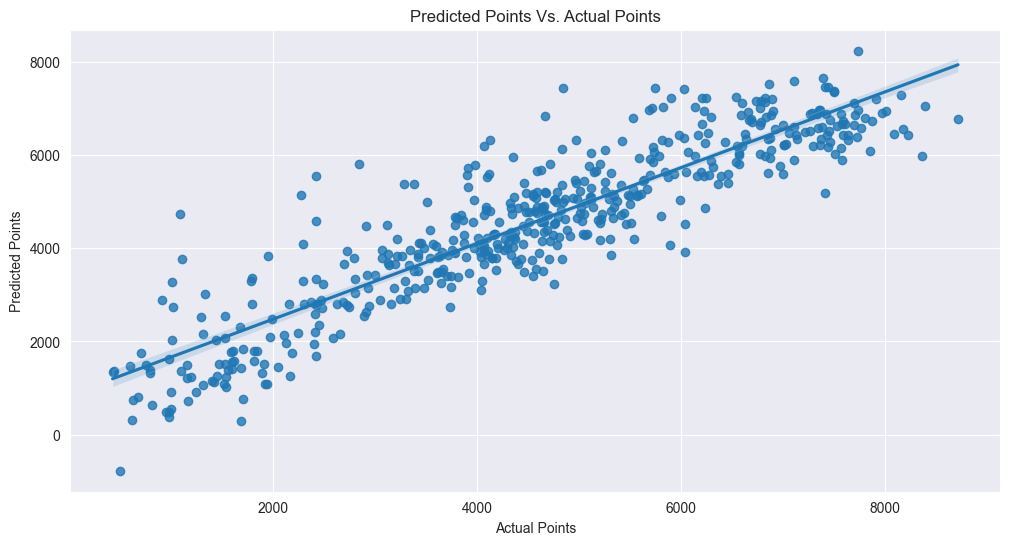

In [267]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

In [268]:
res = (y_train - y_train_pred)

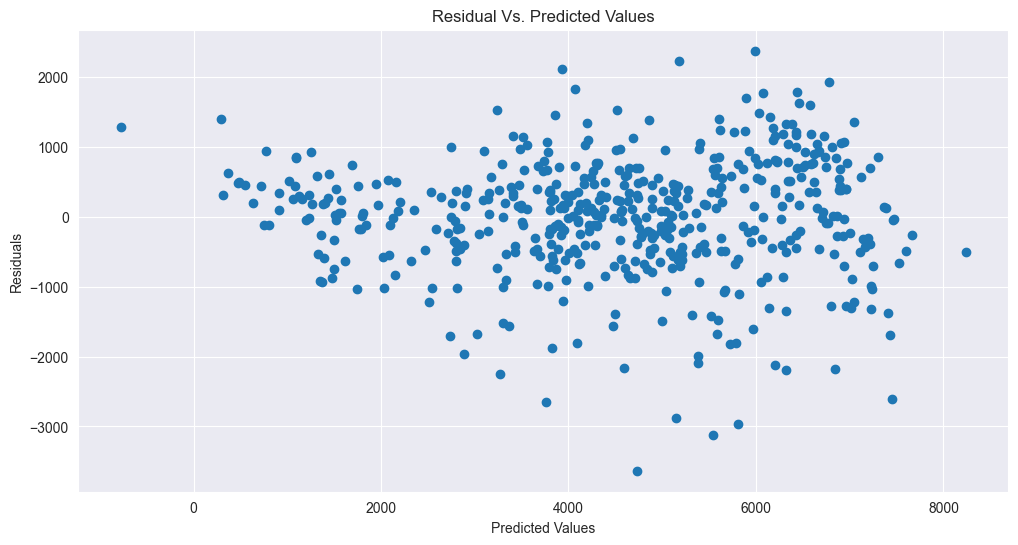

In [269]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [270]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.8061354900977835

> **A good score of around 81.5% is achieved by the final model accuracy.**

> **It is acceptable that the model accuracy gap between the Train and Test Data is less than 3%.**

In [271]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols_data = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

lm = build_model(cols_data)

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          9.41e-177
Time:                        22:40:54   Log-Likelihood:                -4162.7
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     501   BIC:                             8388.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 479.7458    124.684      3.848      0.000     234.779     724.713
yr                   1983.5977     74.982     26.454      0.000    1836.279    2130.917
season_spring         742.2609    102.849      7.217      0.000     540.193     944.329
mnth_jul             -131.8335    162.663     -0.810      0.418    -451.420     187.753
season_winter        1291.0722     95.828     13.473      0.000    1102.799    1479.346
mnth_sept             815.9921    144.919      5.631      0.000     531.268    1100.716
weekday_sun          -351.3910    104.382     -3.366      0.001    -556.472    -146.310
weathersit_bad      -2266.6656    225.049    -10.072      0.000   -2708.822   -1824.509
weathersit_moderate  -676.2708     79.719     -8.483      0.000    -832.895    -519.647
temp                 5116.5936    206.828     24.738      0.000    4710.237    5522.950
==============================================================================
Omnibus:                       51.418   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.708
Skew:                          -0.654   Prob(JB):                     2.45e-19
Kurtosis:                       4.521   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
Important factors to consider when forecasting the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year
- Sunday
- weathersit( Light Snow, Mist + Cloud

> **The most important factor that favorably impacts business is temperature.**

> **However, other environmental factors including humidity, wind speed, rain, and cloud cover have a detrimental impact on business.**

> **Businesses must consider how to deal with inclement weather and devise a plan of action that shields users from precipitation.**

> **The demand for bikes is higher in the winter and summer months since most people dislike riding their bikes on wet days or during the rainy season.**

> **It's fascinating to observe that more people prefer to rent bikes on Saturdays than on other typical days.**

> **The fact that the demand for bike rentals has grown dramatically between 2018 and 2019 indicates that Boom Bikes is operating a business.**

> **Despite the fact that BOOM Bikes expects their business to expand by 19% without investing a single penny**siness.**